In [12]:
import pandas as pd
df=pd.read_csv("C:\\Users\\maheh\\Downloads\\EDA2\\EDA2\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [3]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [4]:
df["workclass"].value_counts()
print(df["education"].value_counts())
print(df["marital_status"].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

C:\Users\maheh\AppData\Local\Temp\ipykernel_33404\2755865744.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64


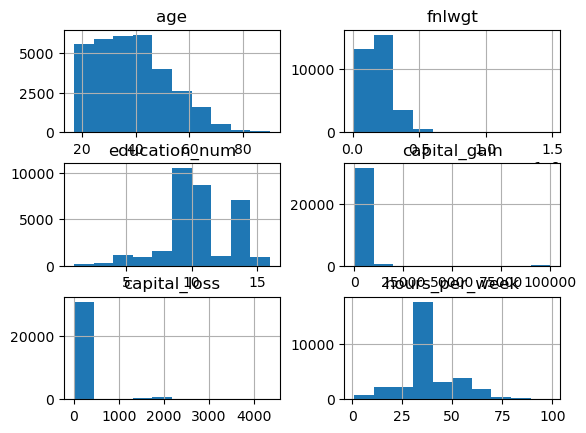

In [6]:
df.hist()
print(df.skew())

array([[<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'fnlwgt_log'}>]], dtype=object)

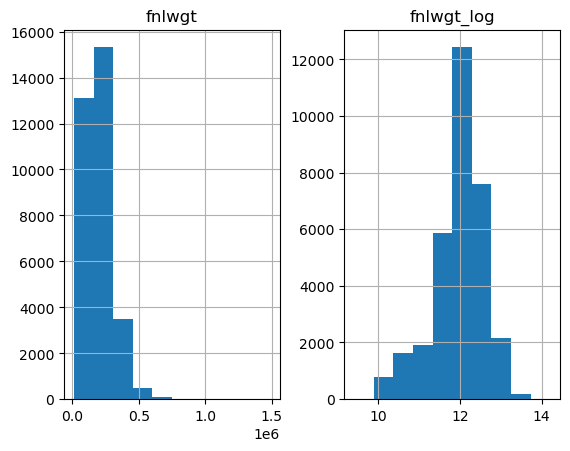

In [7]:
import numpy as np

df["fnlwgt_log"]=np.log1p(df["fnlwgt"])
df[["fnlwgt","fnlwgt_log"]].hist()

In [8]:
from sklearn.preprocessing import MinMaxScaler
MM= MinMaxScaler()
for columns in df.columns:
    if df[columns].dtype== 'int':
        df[columns]=MM.fit_transform(df[[columns]])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,fnlwgt_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,11.258253
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,11.330348
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,12.281398
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12.366157
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,12.732013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,12.458010
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11.947140
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11.931050
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,12.213500


StandarScaler :It scales the data with mean=0 and St.deviation 1
MinMax Scaler: It scales the data vetween the range of 0 to 1
Preference:
--->Use StandardScaler if the data is normally distributed otherwise use MinMax Scaler

In [9]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# Initialize encoders
OHE=OneHotEncoder(sparse_output=False)
LE=LabelEncoder()



# Loop through each column
for column in df.select_dtypes(include=['object']).columns:
    num_unique_categories = df[column].nunique()
    
    if num_unique_categories < 5:
        # Apply One-Hot Encoding
        transformed = OHE.fit_transform(df[[column]])
        transformed_df = pd.DataFrame(transformed, columns=OHE.get_feature_names_out([column]))
        df = df.drop(column, axis=1).join(transformed_df)
    else:
        # Apply Label Encoding
        df[column] = LE.fit_transform(df[column])

# Display the DataFrame
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,11.258253,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,11.330348,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,12.281398,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,12.366157,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,12.732013,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,12.458010,1.0,0.0,1.0,0.0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,11.947140,0.0,1.0,0.0,1.0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,11.931050,1.0,0.0,1.0,0.0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,12.213500,0.0,1.0,1.0,0.0


In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

Lower_limit=Q1-2.5*IQR
Upper_limit=Q3+2.5*IQR

outliers=((df < Lower_limit) | (df > Upper_limit))
df_clean=df[~outliers.any(axis=1)]
df_clean

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,12.281398,0.0,1.0,1.0,0.0
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,12.558780,1.0,0.0,1.0,0.0
12,23,4,122272,9,13,4,1,3,4,0,0,30,39,11.714012,1.0,0.0,1.0,0.0
17,32,4,186824,11,9,4,7,4,4,0,0,40,39,12.137928,0.0,1.0,1.0,0.0
24,59,4,109015,11,9,0,13,4,4,0,0,40,39,11.599250,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,37,4,198216,7,12,0,13,1,4,0,0,40,39,12.197118,1.0,0.0,1.0,0.0
32552,43,4,84661,8,11,2,12,0,4,0,0,45,39,11.346422,0.0,1.0,1.0,0.0
32555,22,4,310152,15,10,4,11,1,4,0,0,40,39,12.644821,0.0,1.0,1.0,0.0
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,12.458010,1.0,0.0,1.0,0.0


Label encoding and one-hot encoding are both techniques for converting categorical data into a format that computers can use. ----->The choice between the two depends on the type of data, the model's requirements, and the desired outcome: 
Label encoding:
Best for ordinal data, where there is an inherent order to the categories. Label encoding can simplify the encoding process and capture the order of categories. However, it can introduce an arbitrary order to categorical data, which can be misleading. 

One-hot encoding:
Best for nominal data, where there is no inherent order to the categories. One-hot encoding can accurately represent the data without introducing artificial ordinal relationships. However, it can create a large number of variables, which can lead to multicollinearity and lower the model's accuracy.


Data size:
One-hot encoding can significantly increase the size of a dataset, which can impact model training time and resource usage. 

Model type:
Label encoding can be particularly damaging for linear or deep learning models. 

Flexibility:
Label encoding allows you to encode as many category columns as you want and choose how to label them. 
Unseen levels

Label encoding can handle unseen levels with minimal extra work. However, the ordering of the levels can be important for the model's performance.

In [13]:
#Features creation
#df["edu_mar_inc"] = df["education"] + '-' + df["marital_status"] +'-' + df["income"]
# Convert columns to strings and concatenate
df["edu_mar_inc"] = df["education"].astype(str) + '-' + df["marital_status"].astype(str) + '-' + df["income"].astype(str)



df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,edu_mar_inc
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors- Never-married- <=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors- Married-civ-spouse- <=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad- Divorced- <=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,11th- Married-civ-spouse- <=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors- Married-civ-spouse- <=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Assoc-acdm- Married-civ-spouse- <=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,HS-grad- Married-civ-spouse- >50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,HS-grad- Widowed- <=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,HS-grad- Never-married- <=50K


In [14]:
from sklearn.ensemble import IsolationForest

# Fit the model
iso_forest = IsolationForest(contamination=0.1)
df['anomaly'] = iso_forest.fit_predict(df.select_dtypes(include=[np.number]))

# Remove outliers
df_clean = df[df['anomaly'] == 1].drop(columns=['anomaly'])
df_clean

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,edu_mar_inc
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors- Never-married- <=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors- Married-civ-spouse- <=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad- Divorced- <=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,11th- Married-civ-spouse- <=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors- Married-civ-spouse- <=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,Some-college- Never-married- <=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Assoc-acdm- Married-civ-spouse- <=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,HS-grad- Married-civ-spouse- >50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,HS-grad- Widowed- <=50K


In [18]:

import ppscore as pps
import warnings
warnings.simplefilter(action="ignore",category=UserWarning)

# Calculate the PPS matrix
pps_matrix = pps.matrix(df)

# Compare with correlation matrix
correlation_matrix = df.corr()

# Display both matrices
print(f'PPS matrix is{pps_matrix}')
print(correlation_matrix)


PPS matrix is           x               y   ppscore            case  is_valid_score  \
0        age             age  1.000000  predict_itself            True   
1        age       workclass  0.011232  classification            True   
2        age          fnlwgt  0.000000      regression            True   
3        age       education  0.052315  classification            True   
4        age   education_num  0.000000      regression            True   
..       ...             ...       ...             ...             ...   
284  anomaly  hours_per_week  0.000000      regression            True   
285  anomaly  native_country  0.000000  classification            True   
286  anomaly          income  0.211620  classification            True   
287  anomaly     edu_mar_inc  0.000000  classification            True   
288  anomaly         anomaly  1.000000  predict_itself            True   

                  metric  baseline_score   model_score  \
0                   None        0.000000

In [ ]:
pip install ppscore